In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

In [16]:
df = pd.read_csv('Spreadsheets/box_score_all.csv')

In [75]:
print('Total number of rows in the dataset = {}'.format(df.shape[0]))
print('Total number of columns in the dataset = {}'.format(df.shape[1]))

Total number of rows in the dataset = 2460
Total number of columns in the dataset = 65


In [76]:
df.head()

,Date,assists,assistsTurnoverRatio,benchPoints,biggestLead,biggestLeadScore,biggestScoringRun,biggestScoringRunScore,blocks,blocksReceived,...,trueShootingPercentage,turnovers,turnoversTeam,turnoversTotal,twoPointersAttempted,twoPointersMade,twoPointersPercentage,Home/Away,Game ID,DatesF
0,2022-10-18T19:30:00-04:00,16.0,1.142857,11.0,8.0,25-17,10.0,25-17,3.0,3.0,...,0.633666,14.0,0.0,14.0,46.0,27.0,0.586957,Away,22200001,2022-10-18
1,2022-10-18T19:30:00-04:00,24.0,2.181818,34.0,16.0,110-126,10.0,25-17,3.0,3.0,...,0.667939,10.0,1.0,11.0,47.0,34.0,0.723404,Home,22200001,2022-10-18
2,2022-10-18T22:00:00-04:00,23.0,1.045455,24.0,2.0,2-0,11.0,64-89,4.0,3.0,...,0.524038,21.0,1.0,22.0,53.0,30.0,0.566038,Away,22200002,2022-10-18
3,2022-10-18T22:00:00-04:00,31.0,1.722222,41.0,27.0,64-91,13.0,64-91,3.0,4.0,...,0.563600,18.0,0.0,18.0,54.0,29.0,0.537037,Home,22200002,2022-10-18
4,2022-10-19T19:00:00-04:00,21.0,1.166667,17.0,15.0,21-6,19.0,21-6,5.0,4.0,...,0.577575,18.0,0.0,18.0,56.0,31.0,0.553571,Away,22200003,2022-10-19


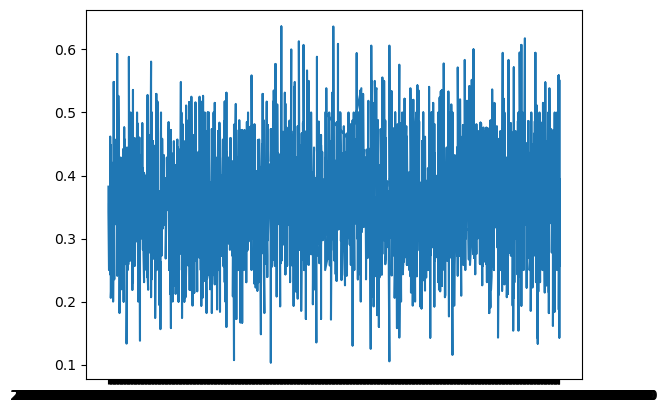

In [3]:
plt.plot('Date', 'threePointersPercentage', data=df) 

<AxesSubplot: xlabel='Date', ylabel='threePointersPercentage'>

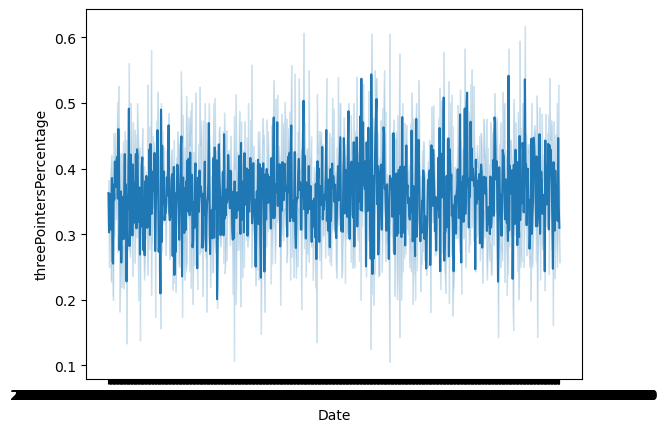

In [4]:
sns.lineplot(x='Date', y='threePointersPercentage', data=df)

### Reformatting Datetime

In [17]:
dates = df["Date"].str.slice(stop=10)

In [18]:
dates = pd.to_datetime(dates, format='%Y-%m-%d')

In [15]:
df['Date']

0       2022-10-18 19:30:00-04:00
1       2022-10-18 19:30:00-04:00
2       2022-10-18 22:00:00-04:00
3       2022-10-18 22:00:00-04:00
4       2022-10-19 19:00:00-04:00
                  ...            
2455    2023-04-09 15:30:00-04:00
2456    2023-04-09 15:30:00-04:00
2457    2023-04-09 15:30:00-04:00
2458    2023-04-09 15:30:00-04:00
2459    2023-04-09 15:30:00-04:00
Name: Date, Length: 2460, dtype: object

In [7]:
dates

0      2022-10-18
1      2022-10-18
2      2022-10-18
3      2022-10-18
4      2022-10-19
          ...    
2455   2023-04-09
2456   2023-04-09
2457   2023-04-09
2458   2023-04-09
2459   2023-04-09
Name: Date, Length: 2460, dtype: datetime64[ns]

In [28]:
df['DatesF'] = dates

### Multilevel Dataframe

In [29]:
multi_df = df.set_index(['DatesF', 'Home/Away'])

In [10]:
multi_df

Date  assists  \
DatesF     Home/Away                                       
2022-10-18 Away       2022-10-18T19:30:00-04:00     16.0   
           Home       2022-10-18T19:30:00-04:00     24.0   
           Away       2022-10-18T22:00:00-04:00     23.0   
           Home       2022-10-18T22:00:00-04:00     31.0   
2022-10-19 Away       2022-10-19T19:00:00-04:00     21.0   
...                                         ...      ...   
2023-04-09 Home       2023-04-09T15:30:00-04:00     28.0   
           Away       2023-04-09T15:30:00-04:00     22.0   
           Home       2023-04-09T15:30:00-04:00     29.0   
           Away       2023-04-09T15:30:00-04:00     47.0   
           Home       2023-04-09T15:30:00-04:00     25.0   

                      assistsTurnoverRatio  benchPoints  biggestLead  \
DatesF     Home/Away                                                   
2022-10-18 Away                   1.142857         11.0          8.0   
           Home                   2.181818         34.0         16.0   
           Away                   1.045455         24.0          2.0   
           Home                   1.722222         41.0         27.0   
2022-10-19 Away                   1.166667         17.0         15.0   
...                                    ...          ...          ...   
2023-04-09 Home                   2.545455         35.0         14.0   
           Away                   2.200000         53.0          6.0   
           Home                   4.142857         40.0         11.0   
           Away                   2.937500         88.0         59.0   
           Home                   1.785714         21.0          0.0   

                     biggestLeadScore  biggestScoringRun  \
DatesF     Home/Away                                       
2022-10-18 Away                 25-17               10.0   
           Home               110-126               10.0   
           Away                   2-0               11.0   
           Home                 64-91               13.0   
2022-10-19 Away                  21-6               19.0   
...                               ...                ...   
2023-04-09 Home                 63-77               13.0   
           Away                 59-53               14.0   
           Home                 17-28               14.0   
           Away                150-91               14.0   
           Home                150-91               12.0   

                     biggestScoringRunScore  blocks  blocksReceived  ...  \
DatesF     Home/Away                                                 ...   
2022-10-18 Away                       25-17     3.0             3.0  ...   
           Home                       25-17     3.0             3.0  ...   
           Away                       64-89     4.0             3.0  ...   
           Home                       64-91     3.0             4.0  ...   
2022-10-19 Away                        21-6     5.0             4.0  ...   
...                                     ...     ...             ...  ...   
2023-04-09 Home                        3-13     7.0             4.0  ...   
           Away                       59-53     5.0             3.0  ...   
           Home                       59-53     3.0             5.0  ...   
           Away                       46-23     6.0             3.0  ...   
           Home                       44-23     3.0             6.0  ...   

                      timesTied  trueShootingAttempts  trueShootingPercentage  \
DatesF     Home/Away                                                            
2022-10-18 Away             7.0                 92.32                0.633666   
           Home             7.0                 94.32                0.667939   
           Away             2.0                104.00                0.524038   
           Home             2.0                109.12                0.563600   
2022-10-19 Away             4.0                 94.36                

In [63]:
sub_df = multi_df.reset_index()
sub_df['threePointersPercentage']

0       0.382353
1       0.342857
2       0.250000
3       0.355556
4       0.366667
          ...   
2455    0.400000
2456    0.217391
2457    0.378378
2458    0.551020
2459    0.257143
Name: threePointersPercentage, Length: 2460, dtype: float64

In [61]:
sub_df

,DatesF,Home/Away,threePointersPercentage
0,2022-10-18,Away,0.382353
1,2022-10-18,Home,0.342857
2,2022-10-18,Away,0.250000
3,2022-10-18,Home,0.355556
4,2022-10-19,Away,0.366667
...,...,...,...
2455,2023-04-09,Home,0.400000
2456,2023-04-09,Away,0.217391
2457,2023-04-09,Home,0.378378
2458,2023-04-09,Away,0.551020


In [12]:
#%% print DataFrame.mean() for average of 3pt%
print(multi_df.loc['2022-10-18']['threePointersPercentage'].mean())

0.3326914098972925


In [13]:
#%% DataFrame.mean() for average of 3pt%
first_day_3pt_averages = multi_df.loc['2022-10-18']['threePointersPercentage'].mean()

In [14]:
#%% DataFrame.sum() of 3ptm
first_day_3pt_made = multi_df.loc['2022-10-18']['threePointersMade'].sum()

In [15]:
#%% DataFrame.sum() of 3pta
first_day_3pt_attempted = multi_df.loc['2022-10-18']['threePointersAttempted'].sum()

In [16]:
#%% Calculated averages of sums
first_days_3pt_averages = first_day_3pt_made/first_day_3pt_attempted

In [17]:
#%% Printing calculated averages of sums
print(first_days_3pt_averages)

0.33116883116883117


In [30]:
#%% Loop collecting daily 3PT% averages
# instantiate list to hold daily 3pt percentage averages
daily_3PtP = []
# loop iterates through each unique date value in dates series
# and 
for d in dates.unique():
    daily_3PtM = multi_df.loc[d]['threePointersMade'].sum()
    daily_3PtA = multi_df.loc[d]['threePointersAttempted'].sum()
    daily_3PtP.append(daily_3PtM/daily_3PtA)

## Tracking Moving Average

7 Day

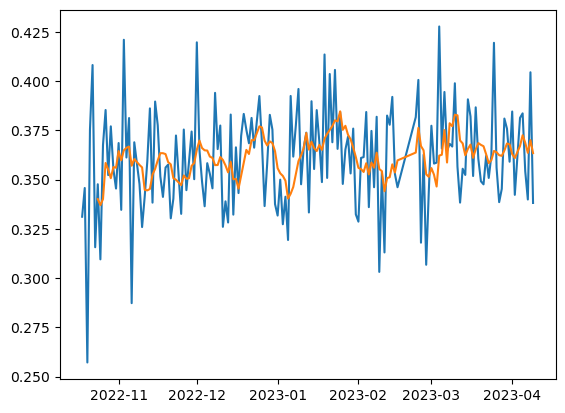

<Figure size 1000x500 with 0 Axes>

In [45]:
# define moving average window
window_size = 7
# calculate rolling average using pandas
rolling_mean = pd.Series(daily_3PtP).rolling(window_size).mean()
# plot daily average of 3pt percentage
sns.lineplot(x=dates.unique(), y=daily_3PtP)
# plot a moving average of 3pt percentage
sns.lineplot(x=dates.unique(), y=rolling_mean)
plt.figure(figsize=(10, 5))
plt.show()

2460


<AxesSubplot: xlabel='Date', ylabel='threePointersPercentage'>

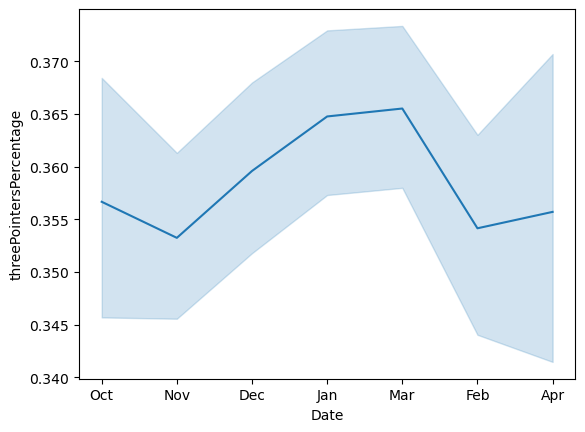

In [66]:
sns.lineplot(x=month_abbr, y=sub_df['threePointersPercentage'])

In [41]:
print(type(dates))

<class 'pandas.core.series.Series'>


In [51]:
s = dates.unique()

In [57]:
new['U-Dates'] = pd.DataFrame(s)

In [55]:
new['Daily 3PtP'] = daily_3PtP

In [64]:
new

,Daily 3PtP,U-Dates
0,0.331169,2022-10-18
1,0.345771,2022-10-19
2,0.257143,2022-10-20
3,0.375342,2022-10-21
4,0.408228,2022-10-22
...,...,...
159,0.383681,2023-04-05
160,0.354286,2023-04-06
161,0.339926,2023-04-07
162,0.404545,2023-04-08


<AxesSubplot: ylabel='Daily 3PtP'>

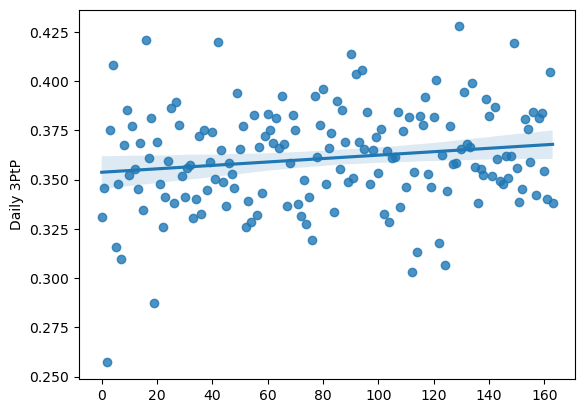

In [72]:
sns.regplot(x=new.index, y='Daily 3PtP', data=new)

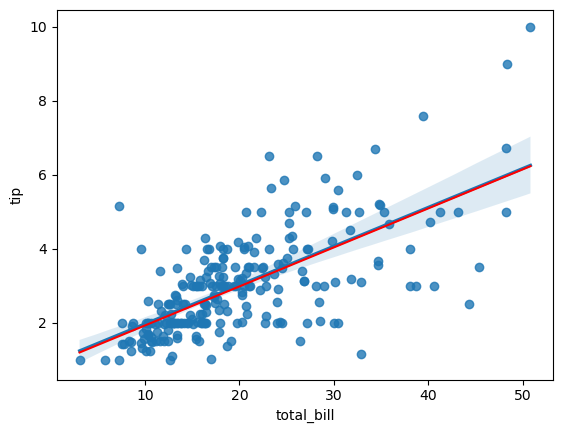

In [74]:
import statsmodels.api as sm

tips = sns.load_dataset("tips")

X = tips["total_bill"]
y = tips["tip"]

X = sm.add_constant(X)

rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()

sns.regplot(x="total_bill", y="tip", data=tips, scatter=True)
sns.lineplot(x=X["total_bill"], y=rlm_results.predict(X), color="red")

plt.show()

In [ ]:
# define moving average window
window_size = 7
# calculate rolling average using pandas
rolling_mean = pd.Series(daily_3PtP).rolling(window_size).mean()
# plot daily average of 3pt percentage
sns.lineplot(x=dates.unique(), y=daily_3PtP)
# plot a moving average of 3pt percentage
sns.lineplot(x=dates.unique(), y=rolling_mean)
plt.figure(figsize=(10, 5))
plt.show()

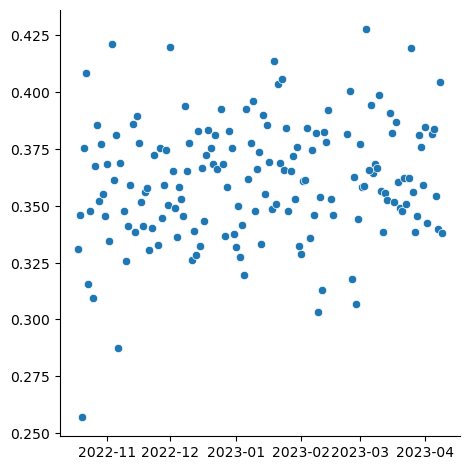

In [83]:
sns.relplot(x=dates.unique(), y=daily_3PtP)

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

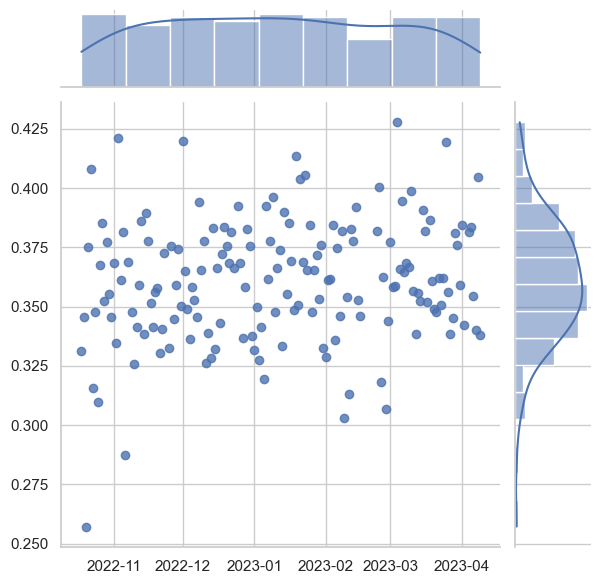

In [95]:
sns.jointplot(x=dates.unique(), y=daily_3PtP, kind="reg")

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

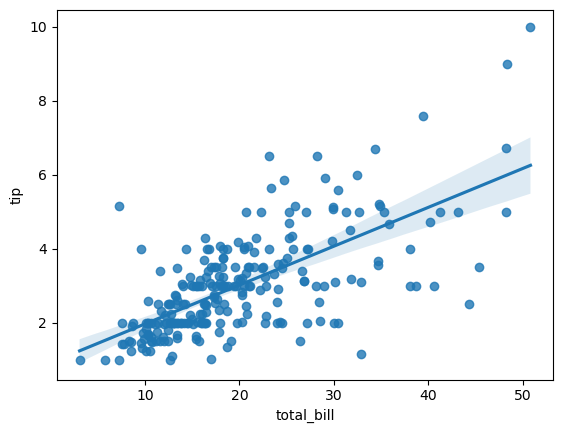

In [80]:
data = sns.load_dataset('tips')

sns.regplot(x='total_bill', y='tip', data=data)

<AxesSubplot: xlabel='year', ylabel='passengers'>

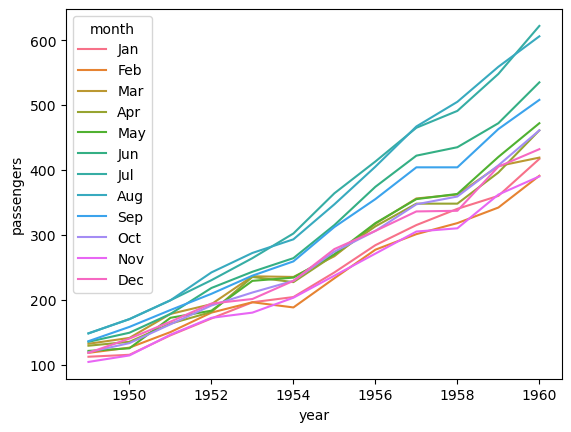

In [20]:
# Load data
df = sns.load_dataset("flights")

# Plot data
sns.lineplot(x='year', y='passengers', hue='month', data=df)